In [1]:
#starting with the real estate price prediction project
#importing the necessary libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
#importing the csv file and getting the first rows print
df1 = pd.read_csv(r"D:\neha\internships_2nd_year\edunet mnsi ai\banglore real estate house prediction\dataset\Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
#printing number of rows and columns
df1.shape

(13320, 9)

In [4]:
#calculating the total count of different area types using aggregate count fucntion
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
#dropping certain columns that may not be useful to predict the price of the house
#storing the new set in another dataframe
df2=df1.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


__##*DATA CLEANING*__

__1. removed the null values__

__2. handled inconsistent data of total_sqft__


In [6]:
#dropping the null values
#uisng the isnull function
#using sum to give the total number of null values
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
#even if we dont want to remove the null values of bath. we can take the median of all the values.
#and fill the empty places with that value
#since there are 1k+ rows, so we can drop them
df3=df2.dropna()
df3.isnull().sum()


location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
#analzing the size column by using the unique function
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
#4 bedroom and 4BHK is same
#creating a new column to maintain consistency
#using the python lambda function, we extract the integer part and convert the string explicitly to integer
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Neha Kasera\AppData\Local\Temp\ipykernel_33448\402458424.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [10]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
#finding the error
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [13]:
#checking unique values of total_sqft column
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
#taking the average pf the range and converting them into single value for clean data
#creating a function in try catch block to handle the errors
def is_float(x):
    try:
        float(x)
    except:
        #incase of the range values
        return False
    return True    
        

In [15]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [16]:
#can make a function to tackle the sq.meter and perch values by converting them to feet
#right now, we'll simply drop the value
#maximum time spent is on data cleaning to remove the outliers and errors etc


In [17]:
#creating a function to convert range into single number by taking average of it
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
convert_sqft_to_num('2166')

2166.0

In [19]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)

In [20]:
df4.head(15)


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [21]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

__##*FEATURE ENGINEERING*__
1. calculating price per sq ft

In [22]:
#in real estate market, price per sq ft is imp
df5=df4.copy()

In [23]:
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head(7)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101


In [24]:
#location is a categorical data and it can create problem
len(df5['location'].unique())

1304

In [25]:
#to handle text data, we convert them into dummy columns using one hot encoding
#if we keep every row, data be gonna big, too many features 
#this is a high dimensionality problem
#to solve this many technqiues available, one to categorize the data, using groupby

In [26]:
df5.location=df5.location.apply(lambda x: x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [27]:
#any location with less than 10 datapoints is other location
len(location_stats[location_stats<=10])

1052

In [28]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [29]:
len(df5.location.unique())

1293

In [30]:
#applying transformation in the df5
df5.location=df5.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [31]:
df5.head(50)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.00,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.00,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.00,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.00,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.00,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.00,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.00,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.00,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.00,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.00,6.0,370.00,6,36274.509804


##*OUTLIER REMOVAL*

In [32]:
#outlier are either data errors or data that possess extreme variations in data
#techniques---standard deviation, simple domain language

In [33]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [34]:
df5.shape


(13246, 7)

In [35]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [36]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [37]:
#removing the extreme values of price per sq ft using standard deviation as we are making a generic model
#will remove the points which are above 1 statistical standard deviation

In [38]:
#function
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df7=remove_pps_outliers(df6)
df7.shape
print(df7.columns)

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')


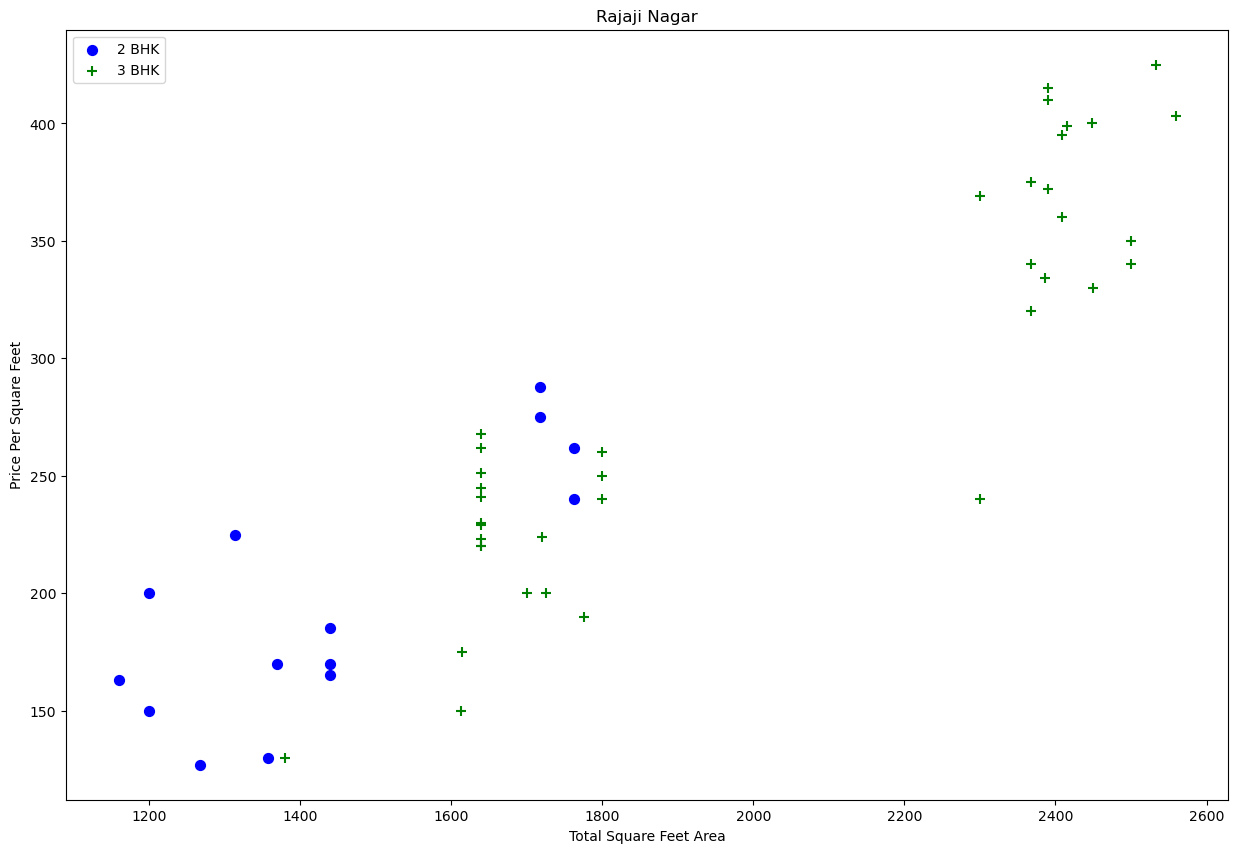

In [39]:
#creating a scatter plot b/w total square ft area and price per sq ft
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker="+", color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
    plt.show()

plot_scatter_chart(df7, "Rajaji Nagar")

__WE SHOULD ALSO REMOVE PROPERTIES WHERE FOR THE SAME LOCATION, THE PRICE OF (FOR EXAMPLE) A 3 BEDROOM APARTMENT IS LESS THAN A 2 BEDROOM APARTMENT (WITH THE SAME SQUARE FT AREA). WHAT WE WILL DO IS FOR A GIVEN LOCATION, WE WILL BUILD A DICTIONARY OF STATS PER BHK, I.E.__

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}

##__NOW WE CAN REMOVE THOSE 2 BHK APARTMENTS WHOSE PRICE_PER_SQFT IS LESS THAN THE MEAN PRICE_PER_SQFT OF 1 BHK APARTMENT__

In [40]:
#function
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis="index")

df8= remove_bhk_outliers(df7)
df8.shape

(7329, 7)

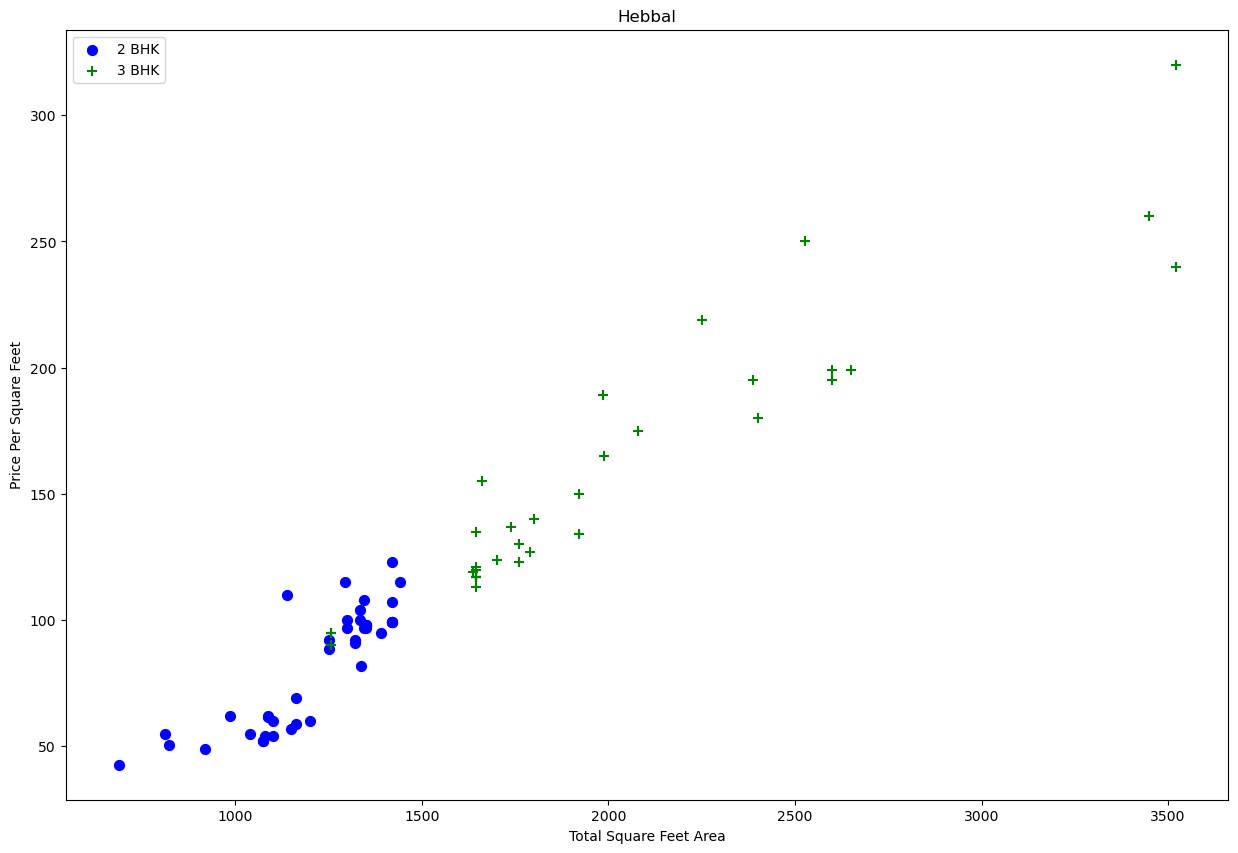

In [41]:

plot_scatter_chart(df8, "Hebbal")

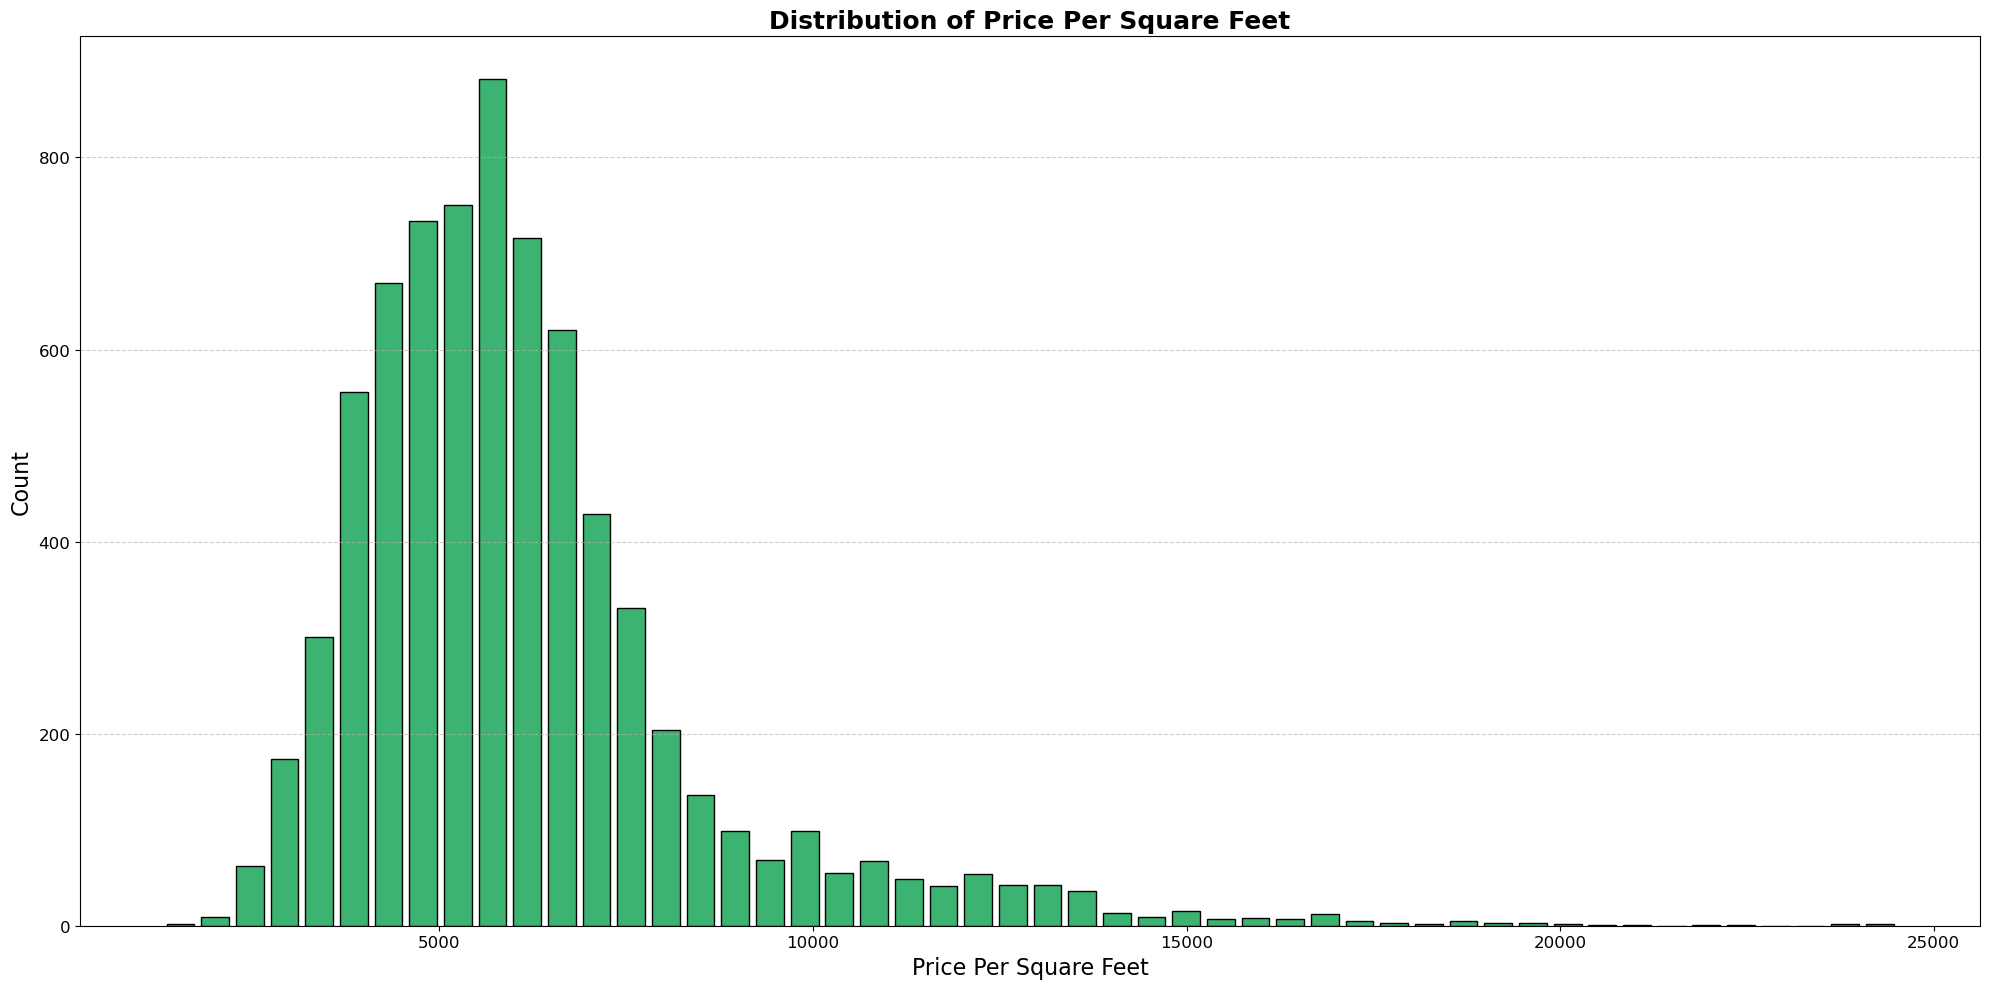

In [42]:
import matplotlib.pyplot as plt
import matplotlib

# Set default figure size globally
matplotlib.rcParams["figure.figsize"] = (20, 10)

# Create histogram
plt.hist(df8.price_per_sqft, bins=50, color='mediumseagreen', edgecolor='black', rwidth=0.8)

# Add labels and title
plt.xlabel("Price Per Square Feet", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Distribution of Price Per Square Feet", fontsize=18, fontweight='bold')

# Add grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adjust tick size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Tight layout for spacing
plt.tight_layout()

# Show plot
plt.show()


In [43]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [44]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


#remove the bath rows which have bhk less than bath


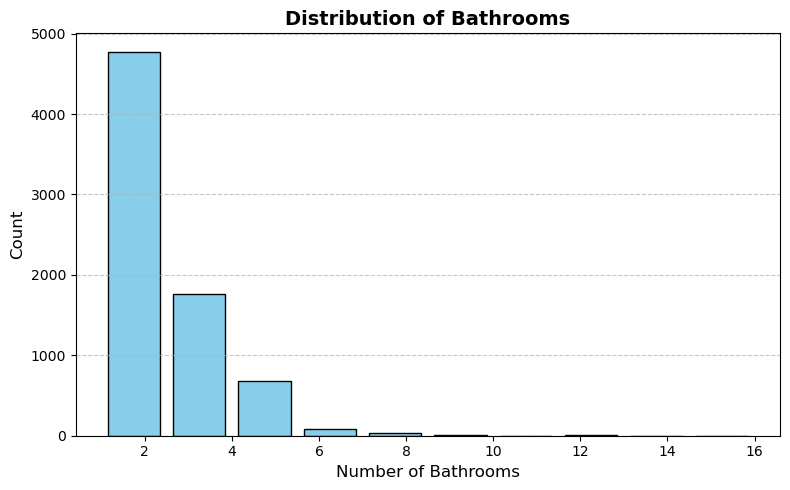

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))  # Set figure size
plt.hist(df8.bath, bins=10, color='skyblue', edgecolor='black', rwidth=0.8)

plt.xlabel("Number of Bathrooms", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Bathrooms", fontsize=14, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


In [46]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [47]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [48]:
#creating a new dataframe and dropping the columns size and pirce_per_sqft
df10=df9.drop(['size', 'price_per_sqft'], axis='columns')
df10.head(10)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,413.0,4
6,1st Block Jayanagar,2450.0,4.0,368.0,4
8,1st Phase JP Nagar,1875.0,3.0,167.0,3
9,1st Phase JP Nagar,1500.0,5.0,85.0,5
10,1st Phase JP Nagar,2065.0,4.0,210.0,3


__to convert text data into numeric value we'll use onehot encoding (by calling the dummies method). for column location__

In [49]:
dummies=pd.get_dummies(df10.location, dtype=int)
dummies.head(5)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df11=pd.concat([df10, dummies.drop('other', axis='columns')], axis='columns')
df11.head(5)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#dropping the location column and storing the resultant dataframe in new dataframe
df12=df11.drop('location', axis='columns')
df12.head(5)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df12.shape

(7251, 245)

__MACHINE MODELLING STARTS HERE__

In [56]:
# the x variable will contain only the independent variables, so we drop the price column
X=df12.drop('price', axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
y=df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

__USING LINEAR REGRESSION MODEL__

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [66]:
#testing different models to get the best model with accurate regression parameters

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"\n{name}:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  MAE:      {mae:.2f}")
    print(f"  MSE:      {mse:.2f}")
    print(f"  RMSE:     {rmse:.2f}")



Linear Regression:
  R² Score: 0.8452
  MAE:      16.59
  MSE:      783.27
  RMSE:     27.99

Decision Tree:
  R² Score: 0.7275
  MAE:      19.98
  MSE:      1378.91
  RMSE:     37.13

Gradient Boosting:
  R² Score: 0.8219
  MAE:      17.85
  MSE:      901.11
  RMSE:     30.02

Random Forest:
  R² Score: 0.7955
  MAE:      17.54
  MSE:      1034.82
  RMSE:     32.17


In [69]:
#based on the different values of parameters, it is observed that linear regression model performs the best
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8452277697874272

In [71]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# Create a pipeline with scaling + model (good practice)
model = make_pipeline(StandardScaler(), LinearRegression())

# Corrected: it's n_splits, not n_split
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

# Evaluate model using cross-validation with a specific scoring
scores = cross_val_score(model, X, y, cv=cv, scoring='r2')  # R² score by default

print("Cross-validated R² scores:", scores)
print("Average R² score:", np.mean(scores))


Cross-validated R² scores: [0.82430186 0.77166234 0.85089567 0.80837764 0.83653286 0.77463657
 0.84724578 0.84813854 0.84493306 0.85893313]
Average R² score: 0.8265657444614586


In [78]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': make_pipeline(StandardScaler(), LinearRegression()),
            'params': {
                'linearregression__fit_intercept': [True, False]
            }
        },
        'ridge': {
            'model': make_pipeline(StandardScaler(), Ridge()),
            'params': {
                'ridge__alpha': [0.1, 1.0, 10.0],
                'ridge__solver': ['auto', 'svd', 'cholesky']
            }
        },
        'lasso': {
            'model': make_pipeline(StandardScaler(), Lasso(max_iter=10000)),
            'params': {
                'lasso__alpha': [0.1, 1.0, 10.0],
                'lasso__selection': ['cyclic', 'random']
            }
        },
        'elasticnet': {
            'model': make_pipeline(StandardScaler(), ElasticNet(max_iter=10000)),
            'params': {
                'elasticnet__alpha': [0.1, 1.0, 10.0],
                'elasticnet__l1_ratio': [0.1, 0.5, 0.9]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Call the function (assumes X and y are defined already)
find_best_model_using_gridsearchcv(X, y)


,model,best_score,best_params
0,linear_regression,0.826566,{'linearregression__fit_intercept': True}
1,ridge,0.826704,"{'ridge__alpha': 10.0, 'ridge__solver': 'svd'}"
2,lasso,0.825960,"{'lasso__alpha': 0.1, 'lasso__selection': 'cyc..."
3,elasticnet,0.826380,"{'elasticnet__alpha': 0.1, 'elasticnet__l1_rat..."
4,decision_tree,0.704034,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [81]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [84]:
# Build the feature vector as a DataFrame, not a NumPy array
import pandas as pd
def predict_price(location, sqft, bath, bhk):
    try:
        x = np.zeros(X.shape[1])
        x[0] = sqft
        x[1] = bath
        x[2] = bhk

        if location in X.columns:
            loc_index = np.where(X.columns == location)[0][0]
            x[loc_index] = 1

        # Convert to DataFrame with correct column names
        x_df = pd.DataFrame([x], columns=X.columns)

        return round(lr_clf.predict(x_df)[0], 2)
    except Exception as e:
        print("Error during prediction:", e)
        return None


In [85]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

83.5

In [88]:
predict_price('1st Phase JP Nagar', 1000, 2, 3)

81.73

In [87]:
predict_price('Indira Nagar', 1000, 3, 3)

184.58

In [89]:
import pickle
with open('banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

In [92]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))